In [5]:
!pip install xlrd

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached https://files.pythonhosted.org/packages/b0/16/63576a1a001752e34bf8ea62e367997530dc553b689356b9879339cf45a4/xlrd-1.2.0-py2.py3-none-any.whl


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import maup
import numpy as np 

In [11]:
precinct_path='../pres16_tab/NorthDakota_Precincts2016.xlsx'
precinct_data= pd.read_excel(precinct_path)

In [12]:
precinct_data.columns

Index(['year', 'stage', 'special', 'state', 'state_postal', 'state_fips',
       'state_icpsr', 'county_name', 'county_fips', 'county_ansi',
       'county_lat', 'county_long', 'jurisdiction', 'precinct', 'candidate',
       'candidate_normalized', 'office', 'district', 'writein', 'party',
       'mode', 'votes', 'candidate_opensecrets', 'candidate_wikidata',
       'candidate_party', 'candidate_last', 'candidate_first',
       'candidate_middle', 'candidate_full', 'candidate_suffix',
       'candidate_nickname', 'candidate_fec', 'candidate_fec_name',
       'candidate_google', 'candidate_govtrack', 'candidate_icpsr',
       'candidate_maplight'],
      dtype='object')

In [13]:
barnes = precinct_data[8:112]
barnes.columns

Index(['year', 'stage', 'special', 'state', 'state_postal', 'state_fips',
       'state_icpsr', 'county_name', 'county_fips', 'county_ansi',
       'county_lat', 'county_long', 'jurisdiction', 'precinct', 'candidate',
       'candidate_normalized', 'office', 'district', 'writein', 'party',
       'mode', 'votes', 'candidate_opensecrets', 'candidate_wikidata',
       'candidate_party', 'candidate_last', 'candidate_first',
       'candidate_middle', 'candidate_full', 'candidate_suffix',
       'candidate_nickname', 'candidate_fec', 'candidate_fec_name',
       'candidate_google', 'candidate_govtrack', 'candidate_icpsr',
       'candidate_maplight'],
      dtype='object')

In [14]:
barnes_precinct = pd.pivot_table(barnes, index=['precinct'], columns=['office','party'], values=['votes'], aggfunc = np.sum)
barnes_precinct.columns
#CAN ADD CANDIDATE 

MultiIndex(levels=[['votes'], ['US President'], ['american delta', 'constitution', 'democratic', 'green', 'libertarian', 'republican']],
           codes=[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]],
           names=[None, 'office', 'party'])

In [15]:
barnes_precinct.columns = barnes_precinct.columns.to_series().str.join('')

In [16]:
barnes_precinct.columns

Index(['votesUS Presidentamerican delta', 'votesUS Presidentconstitution',
       'votesUS Presidentdemocratic', 'votesUS Presidentgreen',
       'votesUS Presidentlibertarian', 'votesUS Presidentrepublican'],
      dtype='object')

In [17]:
barnes_precinct = barnes_precinct.drop(
     columns=['votesUS Presidentamerican delta', 'votesUS Presidentconstitution',\
              'votesUS Presidentgreen'])

In [19]:
index_dict = {
    'Precinct 2401-00'
}
col_dict= {
    'votesUS Presidentdemocratic' : 'PRES16D', 
    'votesUS Presidentlibertarian': 'PRES16L',
    'votesUS Presidentrepublican':  'PRES16R'
}
barnes_precinct = barnes_precinct.rename_axis('PRECINCT')
barnes_precinct = barnes_precinct.rename(columns=col_dict)
barnes_precinct.head()
#barnes_precinct.to_csv(precinct_path.rsplit('.',1)[0] + '_barnes.csv')

,PRES16D,PRES16L,PRES16R
PRECINCT,,,
Precinct 2401-00,141,29,240
Precinct 2402-00,233,53,372
Precinct 2403-00,164,40,230
Precinct 2404-00,205,51,347
Precinct 2405-00,289,66,451


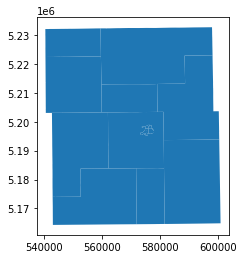

In [23]:
#join by precinct name 
barnes_shp = './barnes/shp/barnes_precincts.shp'
barnes_gdf = gpd.read_file(barnes_shp)
barnes_gdf.head()

In [31]:
merged = pd.merge(barnes_gdf, barnes_precinct, 
                  left_on="PRECINCT", right_on="PRECINCT")
merged.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PRECINCT,geometry,PRES16D,PRES16L,PRES16R
0,38,003,968000,3055,380039680003055,Block 3055,G5040,R,None,None,S,0,774492,+46.9006185,-098.1476383,Precinct 2411-00,"POLYGON ((581244.812 5194690.487, 581244.445 5...",144,39,380
1,38,003,968300,1008,380039683001008,Block 1008,G5040,U,90055,C,S,16436,0,+46.9385876,-097.9951834,Precinct 2401-00,"POLYGON ((576359.510 5198882.689, 576374.126 5...",141,29,240
2,38,003,968300,2011,380039683002011,Block 2011,G5040,U,90055,C,S,129204,0,+46.9266554,-097.9924004,Precinct 2402-00,"POLYGON ((576000.092 5197629.977, 575996.477 5...",233,53,372
3,38,003,968200,1010,380039682001010,Block 1010,G5040,U,90055,C,S,12764,0,+46.9226442,-098.0111948,Precinct 2403-00,"POLYGON ((575223.557 5197091.331, 575248.252 5...",164,40,230
4,38,003,968300,3025,380039683003025,Block 3025,G5040,U,90055,C,S,13378,0,+46.9246130,-098.0098028,Precinct 2404-00,"POLYGON ((574003.137 5196356.668, 574032.888 5...",205,51,347


In [35]:
outpath = './barnes/joined/barnes_precincts_joinedPRES16.shp'
merged.to_file(outpath)